In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df2=pd.read_csv(r"D:\python\projects\spotify\spotify_data_dictionary Description.csv")
df2.head()

,Field,Description
0,spotify_track_uri,Spotify URI that uniquely identifies each trac...
1,ts,Timestamp indicating when the track stopped pl...
2,platform,Platform used when streaming the track
3,ms_played,Number of milliseconds the stream was played
4,track_name,Name of the track


In [3]:
df=pd.read_csv(r"D:\python\projects\spotify\spotify_history.csv")
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [4]:
df.shape

(149860, 11)

In [5]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [6]:
df.dropna()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [9]:
df.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

#### 1.What is the average listening duration per session across different platforms ?

In [11]:
df['ms_played_minutes'] = df['ms_played'] / 60000 

In [12]:
# Group by platform and find average listening duration per play
avg_listening_duration = df.groupby('platform')['ms_played_minutes'].mean().reset_index()
print(avg_listening_duration)

         platform  ms_played_minutes
0         android           2.084665
1  cast to device           3.108330
2             iOS           2.749268
3             mac           3.570138
4      web player           1.861935
5         windows           2.303996


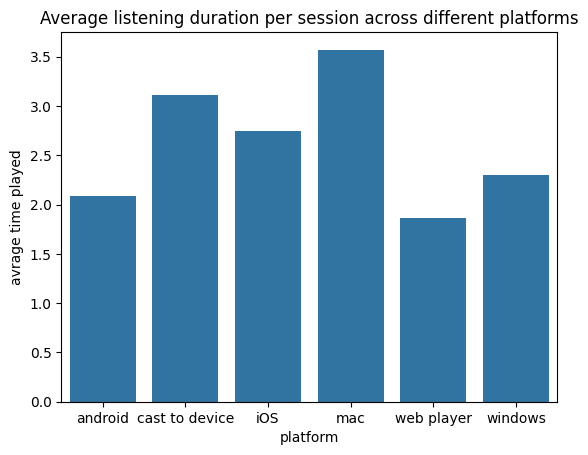

In [33]:
sns.barplot(x=avg_listening_duration['platform'],y=avg_listening_duration['ms_played_minutes'])
plt.title("Average listening duration per session across different platforms")
plt.xlabel("platform")
plt.ylabel("avrage time played")
plt.show()

#### 2 What percentage of tracks are skipped, and does it vary by platform or shuffle mode?

In [34]:
total_tracks = len(df)
skipped_tracks = df['skipped'].sum()
overall_skip_rate = (skipped_tracks / total_tracks) * 100

print(f"Overall skip rate: {overall_skip_rate:.2f}%")

Overall skip rate: 5.25%


In [35]:
skip_by_platform = df.groupby('platform')['skipped'].agg(['count', 'sum'])
skip_by_platform['skip_rate_%'] = (skip_by_platform['sum'] / skip_by_platform['count']) * 100

print(skip_by_platform[['skip_rate_%']])

                skip_rate_%
platform                   
android            5.182340
cast to device     0.000000
iOS               10.265661
mac                6.122449
web player         0.000000
windows           14.074512


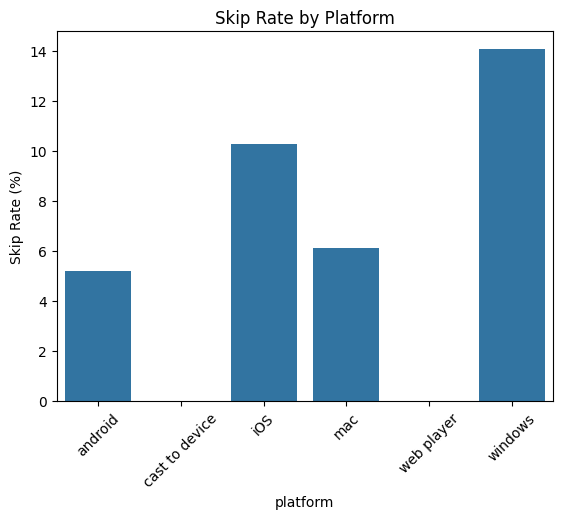

In [37]:
sns.barplot(x=skip_by_platform.index, y=skip_by_platform['skip_rate_%'])
plt.title("Skip Rate by Platform")
plt.ylabel("Skip Rate (%)")
plt.xticks(rotation=45)
plt.show()

In [38]:
skip_by_shuffle = df.groupby('shuffle')['skipped'].agg(['count', 'sum'])
skip_by_shuffle['skip_rate_%'] = (skip_by_shuffle['sum'] / skip_by_shuffle['count']) * 100

print(skip_by_shuffle[['skip_rate_%']])

         skip_rate_%
shuffle             
False       4.323745
True        5.568949


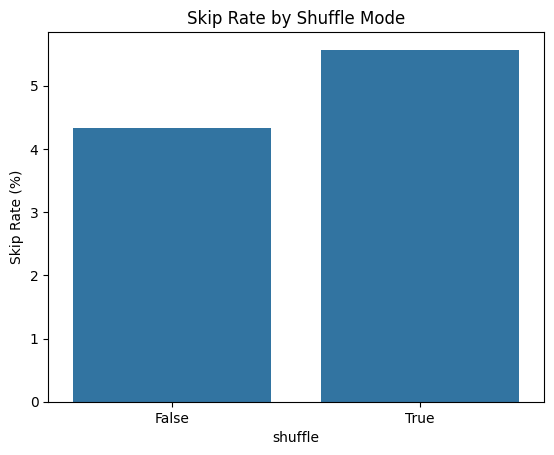

In [39]:
sns.barplot(x=skip_by_shuffle.index.astype(str), y=skip_by_shuffle['skip_rate_%'])
plt.title("Skip Rate by Shuffle Mode")
plt.ylabel("Skip Rate (%)")
plt.show()

#### 3 Is there a relationship between shuffle mode and skip rate?

In [40]:
skip_by_shuffle = df.groupby('shuffle')['skipped'].agg(['count', 'sum'])
skip_by_shuffle['skip_rate_%'] = (skip_by_shuffle['sum'] / skip_by_shuffle['count']) * 100

print(skip_by_shuffle)


          count   sum  skip_rate_%
shuffle                           
False     38277  1655     4.323745
True     111583  6214     5.568949


In [41]:
# Contingency table
contingency = pd.crosstab(df['shuffle'], df['skipped'])

print(contingency)


skipped   False  True 
shuffle               
False     36622   1655
True     105369   6214


In [42]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"P-value: {p:.4f}")

P-value: 0.0000


##### pvalue is <0.5 means there is correlation between shuffle and skipped

In [47]:
heat= df[['shuffle','skipped']].head(50)

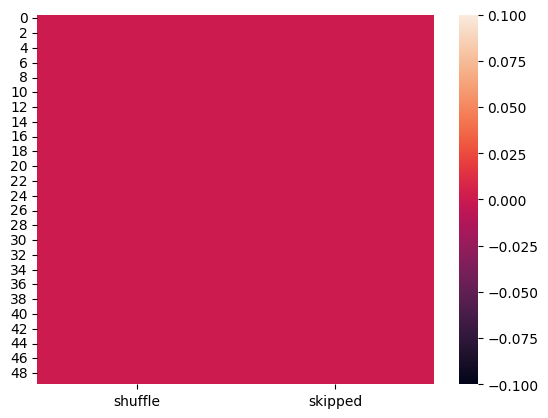

In [48]:
sns.heatmap(heat)
plt.show()

#### 4 At what time of day do users listen to the most music?

In [49]:
# Assuming df is your DataFrame
df['ts'] = pd.to_datetime(df['ts'])  # Convert to datetime
df['hour'] = df['ts'].dt.hour        # Extract hour

In [50]:
# Group by hour and sum up the minutes played
hourly_play = df.groupby('hour')['ms_played_minutes'].sum().reset_index()

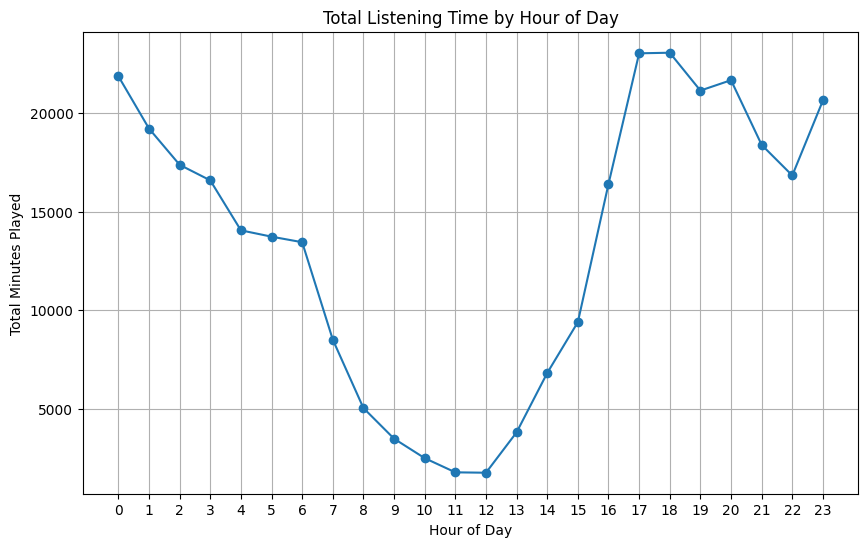

In [51]:
# Plot for better visualization
plt.figure(figsize=(10,6))
plt.plot(hourly_play['hour'], hourly_play['ms_played_minutes'], marker='o')
plt.title('Total Listening Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Minutes Played')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [52]:
# Find the peak hour
peak_hour = hourly_play.loc[hourly_play['ms_played_minutes'].idxmax()]
print(f"Users listen to the most music at {peak_hour['hour']}:00, totaling {peak_hour['ms_played_minutes']:.2f} minutes.")


Users listen to the most music at 18.0:00, totaling 23060.83 minutes.


### Content Preference Analysis

#### 5 Which artists or tracks are played the most?

In [53]:
# Top 10 most played tracks by count
top_tracks_by_count = df['track_name'].value_counts().head(10)
print("Top 10 most played tracks (by count):")
print(top_tracks_by_count)

# Top 10 most played artists by count
top_artists_by_count = df['artist_name'].value_counts().head(10)
print("\nTop 10 most played artists (by count):")
print(top_artists_by_count)

Top 10 most played tracks (by count):
track_name
Ode To The Mets                      207
In the Blood                         181
Dying Breed                          166
Caution                              164
19 Dias y 500 Noches - En Directo    148
For What It's Worth                  146
All These Things That I've Done      142
Concerning Hobbits                   142
Come Together - Remastered 2009      137
The Boxer                            135
Name: count, dtype: int64

Top 10 most played artists (by count):
artist_name
The Beatles           13621
The Killers            6878
John Mayer             4855
Bob Dylan              3814
Paul McCartney         2697
Led Zeppelin           2482
Johnny Cash            2478
The Rolling Stones     2390
Radiohead              2305
The Black Keys         2231
Name: count, dtype: int64


#### 6 Which albums/artists have the longest average playtime per track

In [54]:
# Average playtime per track for each artist
artist_avg_playtime = df.groupby('artist_name')['ms_played_minutes'].mean().sort_values(ascending=False).head(10)

print("Top 10 Artists with Longest Average Playtime per Track:")
print(artist_avg_playtime)

Top 10 Artists with Longest Average Playtime per Track:
artist_name
Cory Weeds                11.029550
Dan Lacksman              10.751342
Dave Matthews Band        10.698767
Mike Oldfield             10.332519
Brad Mehldau              10.008883
George Martin              9.493550
Azymuth                    9.469667
Mudcrutch                  9.468217
Robe                       9.177100
Les Ya Toupas Du Zaire     8.943100
Name: ms_played_minutes, dtype: float64


In [55]:
# Average playtime per track for each album
album_avg_playtime = df.groupby('album_name')['ms_played_minutes'].mean().sort_values(ascending=False).head(10)

print("\nTop 10 Albums with Longest Average Playtime per Track:")
print(album_avg_playtime)


Top 10 Albums with Longest Average Playtime per Track:
album_name
Terrapin Station                                                                                              16.164200
Live At Wrigley Field                                                                                         16.123100
Tubular Bells                                                                                                 11.623163
Mozart: Symphonies Nos. 29, K.201; 33, K.319; 35, K.385 "Haffner"; 38, K.504 "Prague"; 41, K.551 "Jupiter"    11.452883
Just Coolin'                                                                                                  11.029550
The Sound Of Belgium Vol. 3                                                                                   10.751342
Introducing Brad Mehldau                                                                                      10.008883
Footprints: The Life And Music Of Wayne Shorter                                              

#### 7 What are the most commonly skipped artists or songs

In [56]:
# Filter only skipped tracks
skipped_df = df[df['skipped'] == True]

# Most skipped songs
most_skipped_songs = skipped_df['track_name'].value_counts().head(10)

print("Top 10 Most Skipped Songs:")
print(most_skipped_songs)

Top 10 Most Skipped Songs:
track_name
Paraíso                                              29
Photograph                                           22
Superheroes                                          21
Switzerland                                          20
What Do You Mean?                                    20
Old Thing Back (feat. Ja Rule and Ralph Tresvant)    19
Diez Mil Maneras                                     18
Drag Me Down                                         18
La Buena y la Mala                                   15
Just Keep Breathing                                  14
Name: count, dtype: int64


In [57]:
# Most skipped artists
most_skipped_artists = skipped_df['artist_name'].value_counts().head(10)

print("\nTop 10 Most Skipped Artists:")
print(most_skipped_artists)


Top 10 Most Skipped Artists:
artist_name
The Beatles           388
The Killers           197
Bob Dylan             163
John Mayer            153
Led Zeppelin          128
The Rolling Stones    125
The Script            121
Imagine Dragons       116
Paul McCartney        107
Radiohead             102
Name: count, dtype: int64


### Engagement & Completion Metrics

#### 8 What is the average listening time before a track is skipped

In [59]:
# Filter only skipped tracks
skipped_df = df[df['skipped'] == True]

# Calculate average listening time before skip
avg_skip_time = skipped_df['ms_played_minutes'].mean()

print(f" Average listening time before a track is skipped: {avg_skip_time:.2f} minutes")

 Average listening time before a track is skipped: 0.52 minutes


#### 9 What are the top reasons for starting and stopping a track

Top Reasons for Starting a Track:
reason_start
trackdone     76655
fwdbtn        53793
clickrow      11228
appload        3729
backbtn        2205
playbtn        1458
remote          477
trackerror      120
unknown          23
nextbtn          21
popup             5
endplay           2
autoplay          1
Name: count, dtype: int64


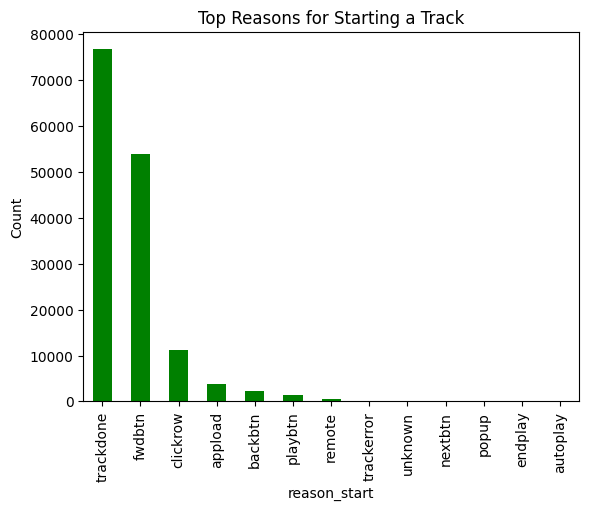

In [60]:
top_start_reasons = df['reason_start'].value_counts()
print("Top Reasons for Starting a Track:")
print(top_start_reasons)
# Plot start reasons
top_start_reasons.plot(kind='bar', title='Top Reasons for Starting a Track', color='green')
plt.ylabel('Count')
plt.show()


Top Reasons for Stopping a Track:
reason_end
trackdone                       77194
fwdbtn                          53470
endplay                         10119
logout                           4367
backbtn                          2182
unexpected-exit-while-paused     1725
unknown                           268
remote                            224
unexpected-exit                   118
clickrow                           34
nextbtn                            21
appload                             7
popup                               6
reload                              4
trackerror                          4
Name: count, dtype: int64


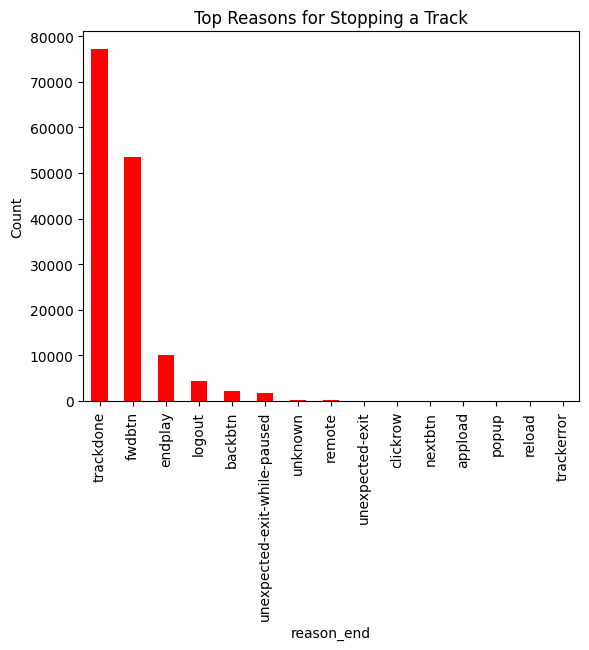

In [61]:
top_end_reasons = df['reason_end'].value_counts()
print("\nTop Reasons for Stopping a Track:")
print(top_end_reasons)
# Plot end reasons
top_end_reasons.plot(kind='bar', title='Top Reasons for Stopping a Track', color='red')
plt.ylabel('Count')
plt.show()

### Trend/Time Series Analysis

#### 11 How has listening behavior changed over time (daily/weekly

In [63]:
# Convert timestamp to datetime if not done yet
df['ts'] = pd.to_datetime(df['ts'])

In [64]:
# Create a date column (date only, no time)
df['date'] = df['ts'].dt.date

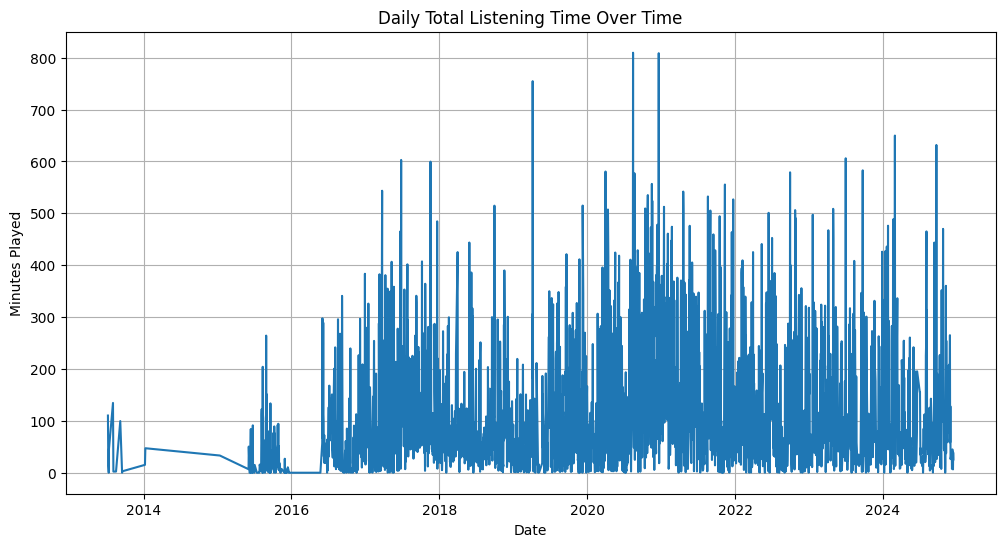

In [65]:
# Aggregate total listening time per day
daily_listening = df.groupby('date')['ms_played_minutes'].sum()

# Plot daily listening over time
plt.figure(figsize=(12,6))
daily_listening.plot()
plt.title('Daily Total Listening Time Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes Played')
plt.grid(True)
plt.show()

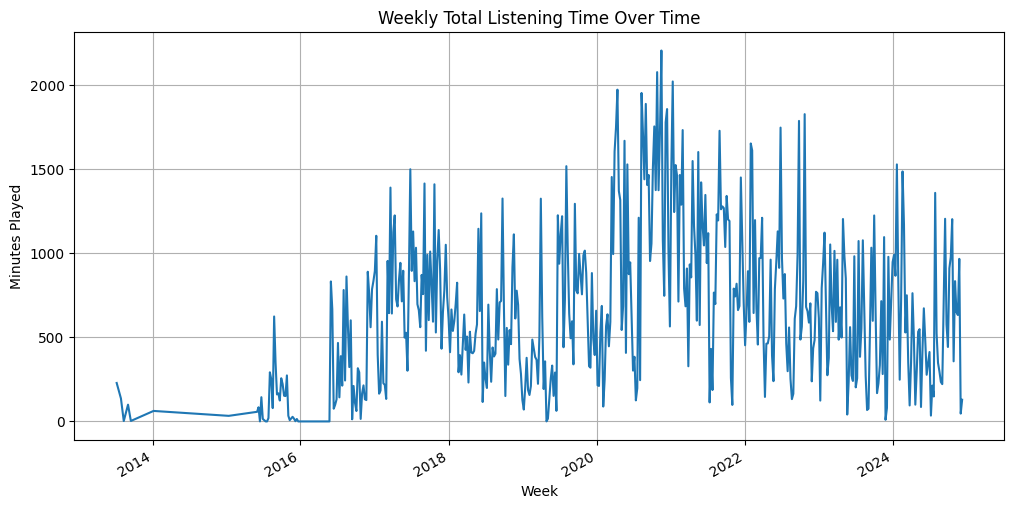

In [66]:
# Create a week column (year + week number)
df['week'] = df['ts'].dt.to_period('W').apply(lambda r: r.start_time)

# Aggregate total listening time per week
weekly_listening = df.groupby('week')['ms_played_minutes'].sum()

# Plot weekly listening over time
plt.figure(figsize=(12,6))
weekly_listening.plot()
plt.title('Weekly Total Listening Time Over Time')
plt.xlabel('Week')
plt.ylabel('Minutes Played')
plt.grid(True)
plt.show()

#### 12 Do users listen to more music on weekends vs weekdays

In [76]:
# Ensure 'ts' is datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract day of week (Monday=0, Sunday=6)
df['day_of_week'] = df['ts'].dt.dayofweek

# Create a column to identify weekend vs weekday
df['is_weekend'] = df['day_of_week'] >= 5  # Saturday=5, Sunday=6

In [77]:
print("Total Listening Time (minutes):")
# Count days in dataset for each category
num_weekend_days = df[df['is_weekend']].ts.dt.date.nunique()
num_weekday_days = df[~df['is_weekend']].ts.dt.date.nunique()

avg_weekend = listening_by_daytype[True] / num_weekend_days
avg_weekday = listening_by_daytype[False] / num_weekday_days

print(f"\nAverage Listening Time per Weekend Day: {avg_weekend:} minutes")
print(f"Average Listening Time per Weekday: {avg_weekday:} minutes")

Total Listening Time (minutes):

Average Listening Time per Weekend Day: 106.28378602442334 minutes
Average Listening Time per Weekday: 122.4272153437816 minutes


### Machine learning 

####  Classification Task: Predict if a Track Will Be Skipped

In [78]:
# Make sure 'skipped' is boolean (if not already)
df['skipped'] = df['skipped'].astype(bool)

# Drop rows with missing values in key columns or fill them if preferred
df = df.dropna(subset=['platform', 'ms_played', 'reason_start', 'reason_end', 'shuffle', 'track_name', 'artist_name', 'album_name'])

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['platform', 'reason_start', 'reason_end', 'shuffle', 'track_name', 'artist_name', 'album_name']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18056\983926452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18056\983926452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18056\983926452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [80]:
X = df[['platform', 'ms_played', 'reason_start', 'reason_end', 'shuffle', 'track_name', 'artist_name', 'album_name']]
y = df['skipped']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.97     28381
        True       0.20      0.00      0.00      1549

    accuracy                           0.95     29930
   macro avg       0.57      0.50      0.49     29930
weighted avg       0.91      0.95      0.92     29930



In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98     28381
        True       0.61      0.19      0.29      1549

    accuracy                           0.95     29930
   macro avg       0.79      0.59      0.63     29930
weighted avg       0.94      0.95      0.94     29930

